In [2]:
import numpy as np 
import pandas as pd 
data = pd.read_csv("titanic .csv").copy()
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [226]:
# I have drop  row
data = data.drop(labels=1309, axis=0)

In [227]:
data.tail(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.875,NaN,S,NaN,NaN,NaN


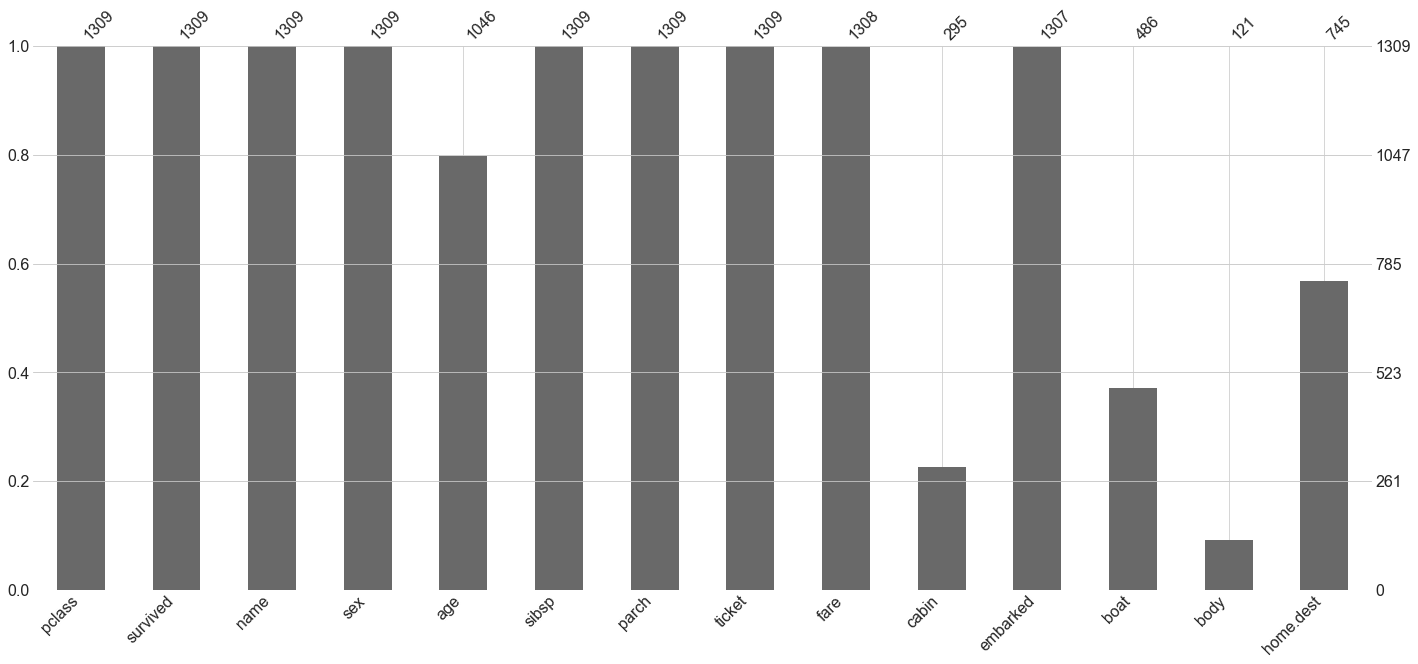

In [228]:
## visualization of missing data structure

import missingno as msno
msno.bar(data);

In [145]:
data.shape

(1309, 14)

In [146]:
data.ndim

2

In [147]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.4+ KB


In [149]:
# We may see Categoric  cariables
data.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [150]:
# ignore null entries
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.0000,72.0000,155.0000,256.000,328.0000


In [3]:
data.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [4]:
data['survived'].count()

1309

In [151]:
data.value_counts()

Series([], dtype: int64)

In [152]:
data['survived'].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [153]:
data.age.unique()

array([29.    ,  0.9167,  2.    , 30.    , 25.    , 48.    , 63.    ,
       39.    , 53.    , 71.    , 47.    , 18.    , 24.    , 26.    ,
       80.    ,     nan, 50.    , 32.    , 36.    , 37.    , 42.    ,
       19.    , 35.    , 28.    , 45.    , 40.    , 58.    , 22.    ,
       41.    , 44.    , 59.    , 60.    , 33.    , 17.    , 11.    ,
       14.    , 49.    , 76.    , 46.    , 27.    , 64.    , 55.    ,
       70.    , 38.    , 51.    , 31.    ,  4.    , 54.    , 23.    ,
       43.    , 52.    , 16.    , 32.5   , 21.    , 15.    , 65.    ,
       28.5   , 45.5   , 56.    , 13.    , 61.    , 34.    ,  6.    ,
       57.    , 62.    , 67.    ,  1.    , 12.    , 20.    ,  0.8333,
        8.    ,  0.6667,  7.    ,  3.    , 36.5   , 18.5   ,  5.    ,
       66.    ,  9.    ,  0.75  , 70.5   , 22.5   ,  0.3333,  0.1667,
       40.5   , 10.    , 23.5   , 34.5   , 20.5   , 30.5   , 55.5   ,
       38.5   , 14.5   , 24.5   , 60.5   , 74.    ,  0.4167, 11.5   ,
       26.5   ])

In [154]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [155]:
data.isnull().sum().any()

True

In [156]:
data.columns[data.isnull().any()]

Index(['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], dtype='object')

In [157]:
data.isnull().values.any()

True

In [158]:
data.isnull().sum().sort_values(ascending = False)

body         1188
cabin        1014
boat          823
home.dest     564
age           263
embarked        2
fare            1
ticket          0
parch           0
sibsp           0
sex             0
name            0
survived        0
pclass          0
dtype: int64

# Missing Value

#### Find missing value

In [159]:
data.body.isnull().sum()

1188

In [160]:
# enterplolasyon,interpolate methods. iki aralik arasindaki ortalamayi alip dolduruyor
data['body]']=data.body.interpolate().head(10)

In [161]:
data.body.notnull().sum()

121

In [165]:
##data[data['body'].notnull()]

In [166]:
#data[data['body'].isnull()]

In [167]:
 data['body']=data.body.interpolate()

In [168]:
data['body'].isnull().sum()

3

In [170]:
#data[data['body'].isnull()]

In [171]:
 body_mean= data['body'].mean()

In [172]:
data.iloc[0,12]=body_mean

In [173]:
data.iloc[1,12]=body_mean

In [174]:
data.iloc[2,12]=body_mean

In [31]:
data[data['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,body]
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,66.000000,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,96.351351,"Cincinatti, OH",NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.000000,NaN,NaN


In [232]:
#drop single variable and two variables
# data.drop('body]',axis =1,inplace =True)
#data.drop(['body]','home.dest'],axis=1,inplace =True)
#data.info()

In [233]:
data.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [234]:
data.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [235]:
# I fill it with Embarki 'S'
data["embarked"] = data["embarked"].fillna("S")
data[data["embarked"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest


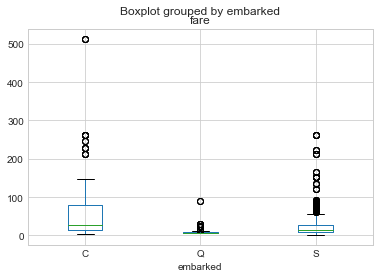

In [236]:
data.boxplot(column='fare',by ='embarked')
plt.show()

In [237]:
data[data['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,NaN


In [238]:
data.fare.fillna(value =data.fare.median(),inplace =True)
data[data["fare"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest


In [41]:
# convert object , float or categorical
##data['age']=data['age'].astype('float')

In [239]:
data[data["age"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,"New York, NY"
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,111427,26.5500,NaN,S,9,"Los Angeles, CA"
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,"Philadelphia, PA"
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,17770,27.7208,NaN,C,5,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3.0,0.0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0.0,0.0,A/5 2466,8.0500,NaN,S,NaN,NaN
1297,3.0,0.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,A/4. 34244,7.2500,NaN,S,NaN,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN


In [240]:
data.age.fillna(value =data.age.mean(),inplace =True)
data[data["age"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest


In [241]:
data['age'].head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

In [50]:
#change only one column of data

In [242]:
data['cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
B96 B98            4
                  ..
T                  1
E52                1
E10                1
B10                1
F E69              1
Name: cabin, Length: 186, dtype: int64

In [243]:
# replaced with most frequent
data['cabin']=data.fillna({'cabin':'C23'})

In [244]:
data['cabin'].notnull().sum()

1309

In [245]:
data["sibsp"].isnull().sum()

0

In [246]:
data['sibsp'].value_counts()

0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

# OUTLIERS

In [247]:
import seaborn as sns
from collections import Counter

<AxesSubplot:>

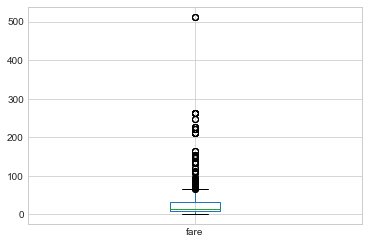

In [248]:
# only look for a variable outlier
data['fare'].plot(kind ='box')

In [249]:
def detect_outliers(df,features):
    outlier_indices =[]
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
                
        IQR = Q3-Q1
        outlier_step =IQR*1.5
        outlier_list_col = df[(df[c]< Q1 -outlier_step) | (df[c] > Q3  + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
        outlier_indices = Counter(outlier_indices)
        multiple_outliers =list(i for i, v in outlier_indices.items()if v>2)
        return multiple_outliers

In [250]:
## for numeric variables 
data.loc[detect_outliers(data,["age","sibsp","parch","fare"])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest


In [251]:
# if we have outlier ,we can use below process
#drop outliers
data = data.drop(detect_outliers(data,["age","sibsp","parch","fare"]),axis =0).reset_index(drop = True)

# Corelation

In [252]:
data.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558683
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244414
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.170850
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160349
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221635
fare,-0.558683,0.244414,0.170850,0.160349,0.221635,1.000000


In [253]:
#sns.pairplot(data,kind ='reg');

In [254]:
#sns.jointplot(x='age', y = 'survived',data =data,kind ='reg');

<AxesSubplot:>

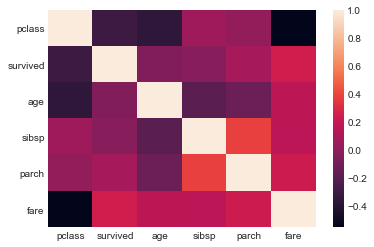

In [255]:
corr=data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [211]:
#gender not visible above ?why
# because it consists of strings, I need to convert it to numeric value to see it on the heatmap
#data['sex']

In [256]:
# 1. way   Normalizasyon
#data["sex"] = data["sex"].astype("category")
#data['sex']=data['sex'].cat.codes
# 2.way
#scaler=preproccesing.LabelEncoder
#data['sex']=scaler.fit_transform('sex')
# 3.way
data['sex'] =[ 1 if i =='male'else 0 for i in data['sex']]

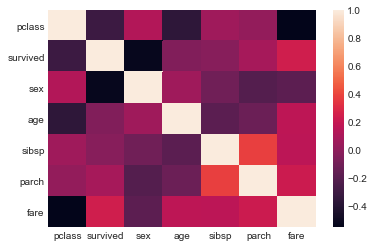

In [257]:
sns.heatmap(data.corr());
##sns.heatmap(data[["age","sex","sibsp","parch","pclass",]].corr(), annot = True)
plt.show()

In [ ]:
## colombia 11_2

In [6]:
###  Categorical features unique values

object_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("====================================")
object_col.remove('home.dest')

sex : ['female' 'male' nan]
male      843
female    466
Name: sex, dtype: int64
embarked : ['S' 'C' nan 'Q']
S    914
C    270
Q    123
Name: embarked, dtype: int64
boat : ['2' '11' nan '3' '10' 'D' '4' '9' '6' 'B' '8' 'A' '5' '7' 'C' '14' '5 9'
 '13' '1' '15' '5 7' '8 10' '12' '16' '13 15 B' 'C D' '15 16' '13 15']
13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
11         25
9          25
16         23
7          23
8          23
6          20
D          20
12         19
2          13
A          11
B           9
1           5
C D         2
13 15       2
5 7         2
13 15 B     1
15 16       1
8 10        1
5 9         1
Name: boat, dtype: int64


ValueError: list.remove(x): x not in list

In [8]:
##  Number of unique values
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")

pclass: Number of unique values 3
survived: Number of unique values 2
name: Number of unique values 1307
sex: Number of unique values 2
age: Number of unique values 98
sibsp: Number of unique values 7
parch: Number of unique values 8
ticket: Number of unique values 929
fare: Number of unique values 281
cabin: Number of unique values 186
embarked: Number of unique values 3
boat: Number of unique values 27
body: Number of unique values 121
home.dest: Number of unique values 369


#### univariate analysis/categorical variable/

In [68]:

def bar_plot(variable):
    
    var = data[variable]
        # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
        # visualize
    plt.figure(figsize=(8,4))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))
    

   
    
       

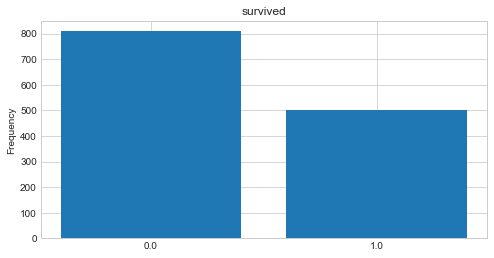

survived:
 0.0    809
1.0    500
Name: survived, dtype: int64


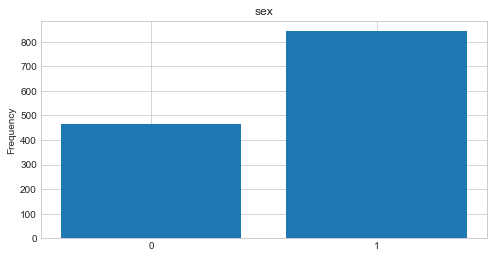

sex:
 1    843
0    467
Name: sex, dtype: int64


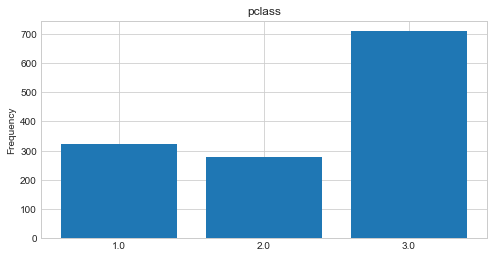

pclass:
 3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64


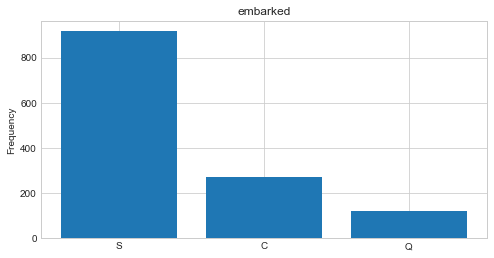

embarked:
 S    917
C    270
Q    123
Name: embarked, dtype: int64


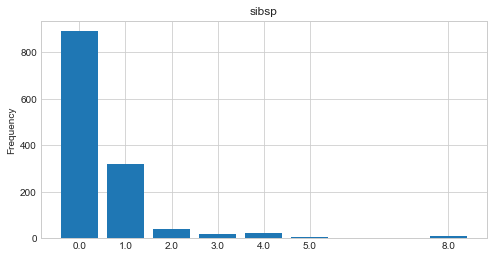

sibsp:
 0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64


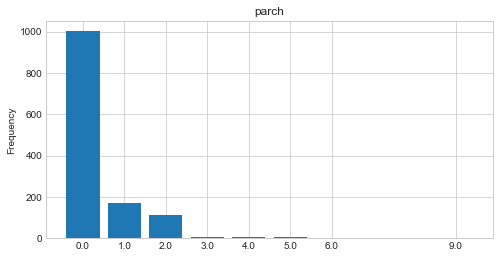

parch:
 0.0    1002
1.0     170
2.0     113
3.0       8
5.0       6
4.0       6
9.0       2
6.0       2
Name: parch, dtype: int64


In [69]:
category1 = ["survived","sex","pclass","embarked","sibsp","parch"]
for c in category1:
    bar_plot(c)

In [70]:
category2 = ["cabin","name","ticket"]
for c in category2:
    print("{} \n ".format (data [c].value_counts))

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
       ... 
1305      3
1306      3
1307      3
1308      3
1309    NaN
Name: cabin, Length: 1310, dtype: object> 
 
<bound method IndexOpsMixin.value_counts of 0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
1309                                                NaN
Name: name, Length: 1310, dtype: object> 
 
<bound method IndexOpsMixin.value_counts of 0        24160
1       113781
2

### Numerical variable analyze

In [71]:

def plot_hist(variable):
    
    plt.figure(figsize = (6,3))
    plt.hist(data[variable],bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(" {} distribution with hist".format(variable))
    plt.show()



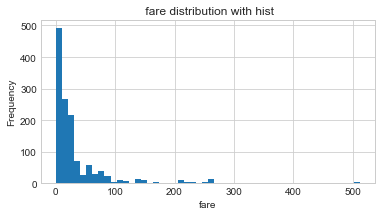

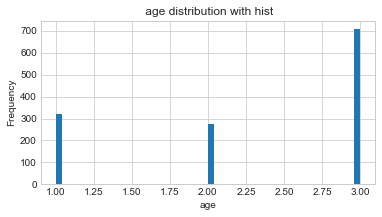

In [72]:
numericVar = ["fare","age"]
for n in numericVar:
    plot_hist(n)

### Basic Veri analizi


In [73]:
#data[['pclass','survived']]

In [74]:
#data[['pclass','survived']].groupby(['pclass'],as_index =False).mean().sort_values("survived",ascending = False)

In [75]:
#data[["sex","survived"]].groupby(["sex"], as_index = False).mean().sort_values("survived",ascending = False)

In [76]:
#data['sex'].value_counts().plot(kind ='bar',color='g')

In [77]:
#data[["sibsp","survived"]].groupby(["sibsp"], as_index = False).mean().sort_values("survived",ascending = False)

In [78]:
#data[["parch","survived"]].groupby(["parch"], as_index = False).mean().sort_values("survived",ascending = False)

In [79]:
#data['parch'].value_counts().plot(kind ='bar',color='y')

### Visualization

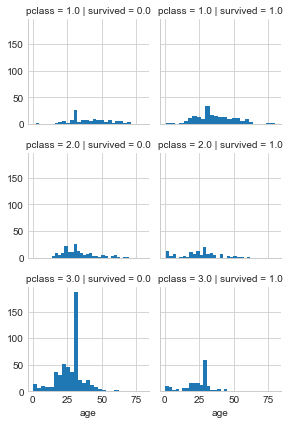

In [258]:
g = sns.FacetGrid(data, col = "survived", row = "pclass", size = 2)
g.map(plt.hist, "age", bins = 25)
g.add_legend()
plt.show()

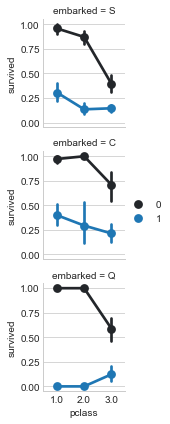

In [259]:
g = sns.FacetGrid(data, row = "embarked", size = 2)
g.map(sns.pointplot, "pclass","survived","sex")
g.add_legend()
plt.show()

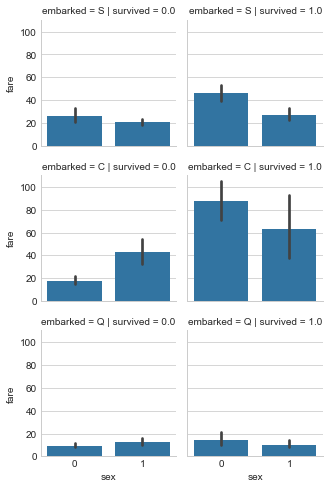

In [260]:
g  = sns.FacetGrid(data, row = "embarked", col = "survived", size = 2.3)
g.map(sns.barplot, "sex", "fare")
g.add_legend()
plt.show()

In [261]:
#sns.factorplot(x = "sex", y = "age", hue = "pclass",data = data, kind = "box")
#plt.show()

## normalizasyon


In [262]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [263]:
data["name"].isnull().sum()

0

In [264]:
data.sort_values('name')


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
600,3.0,0.0,"Abbing, Mr. Anthony",1,42.000000,0.0,0.0,C.A. 5547,7.5500,3,S,NaN,NaN
601,3.0,0.0,"Abbott, Master. Eugene Joseph",1,13.000000,0.0,2.0,C.A. 2673,20.2500,3,S,NaN,"East Providence, RI"
602,3.0,0.0,"Abbott, Mr. Rossmore Edward",1,16.000000,1.0,1.0,C.A. 2673,20.2500,3,S,NaN,"East Providence, RI"
603,3.0,1.0,"Abbott, Mrs. Stanton (Rosa Hunt)",0,35.000000,1.0,1.0,C.A. 2673,20.2500,3,S,A,"East Providence, RI"
604,3.0,1.0,"Abelseth, Miss. Karen Marie",0,16.000000,0.0,0.0,348125,7.6500,3,S,16,"Norway Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2.0,1.0,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",0,24.000000,1.0,0.0,SC/PARIS 2167,27.7208,2,C,12,"Lucca, Italy / California"
1262,3.0,0.0,"van Billiard, Master. James William",1,29.881135,1.0,1.0,A/5. 851,14.5000,3,S,NaN,NaN
1263,3.0,0.0,"van Billiard, Master. Walter John",1,11.500000,1.0,1.0,A/5. 851,14.5000,3,S,NaN,NaN
1264,3.0,0.0,"van Billiard, Mr. Austin Blyler",1,40.500000,0.0,2.0,A/5. 851,14.5000,3,S,NaN,NaN


In [265]:
data.drop_duplicates(subset = 'name',keep='first').sort_values('name')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
600,3.0,0.0,"Abbing, Mr. Anthony",1,42.000000,0.0,0.0,C.A. 5547,7.5500,3,S,NaN,NaN
601,3.0,0.0,"Abbott, Master. Eugene Joseph",1,13.000000,0.0,2.0,C.A. 2673,20.2500,3,S,NaN,"East Providence, RI"
602,3.0,0.0,"Abbott, Mr. Rossmore Edward",1,16.000000,1.0,1.0,C.A. 2673,20.2500,3,S,NaN,"East Providence, RI"
603,3.0,1.0,"Abbott, Mrs. Stanton (Rosa Hunt)",0,35.000000,1.0,1.0,C.A. 2673,20.2500,3,S,A,"East Providence, RI"
604,3.0,1.0,"Abelseth, Miss. Karen Marie",0,16.000000,0.0,0.0,348125,7.6500,3,S,16,"Norway Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2.0,1.0,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",0,24.000000,1.0,0.0,SC/PARIS 2167,27.7208,2,C,12,"Lucca, Italy / California"
1262,3.0,0.0,"van Billiard, Master. James William",1,29.881135,1.0,1.0,A/5. 851,14.5000,3,S,NaN,NaN
1263,3.0,0.0,"van Billiard, Master. Walter John",1,11.500000,1.0,1.0,A/5. 851,14.5000,3,S,NaN,NaN
1264,3.0,0.0,"van Billiard, Mr. Austin Blyler",1,40.500000,0.0,2.0,A/5. 851,14.5000,3,S,NaN,NaN


In [266]:
# ihtiyac oldugunda attribut leri drop edebiliriz.
##data.drop(labels = ["passengerId", "cabin"], axis = 1, inplace = True)

In [89]:
"""
# cok sinifli donusum
#TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

scales=LabelEncoder()
data['new_name']=scales.fit_transform(data['name'])
"""

"\n# cok sinifli donusum\n#TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']\n\nscales=LabelEncoder()\ndata['new_name']=scales.fit_transform(data['name'])\n"

In [90]:
"""
#generate binary values using get_dummies
dum_df = pd.get_dummies(data, columns=["name"], prefix=["Type is"] ,suffix= ['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'body]'],
      dtype=['object'])
# merge with main df bridge_df on key values
data = data.join(dum_df)
data
"""


'\n#generate binary values using get_dummies\ndum_df = pd.get_dummies(data, columns=["name"], prefix=["Type is"] ,suffix= [\'pclass\', \'survived\', \'sex\', \'age\', \'sibsp\', \'parch\', \'ticket\', \'fare\',\n       \'cabin\', \'embarked\', \'boat\', \'body\', \'home.dest\', \'body]\'],\n      dtype=[\'object\'])\n# merge with main df bridge_df on key values\ndata = data.join(dum_df)\ndata\n'

In [267]:
# normalization
# just numeric variables
#normalizasyon sadece nasil yapabilecegimi uyguluyorum. kaydetmiyorum/ sayisal verilere uygulanir.
#standart dev =1,  mean = 0
# preprocessing.normalize(data)
from sklearn import preprocessing
#preprocessing.normalize(data)

In [268]:
data.corr().nlargest(5,'survived')

,pclass,survived,sex,age,sibsp,parch,fare
survived,-0.312469,1.000000,-0.528693,-0.050199,-0.027825,0.082660,0.244414
fare,-0.558683,0.244414,-0.185681,0.170850,0.160349,0.221635,1.000000
parch,0.018322,0.082660,-0.213125,-0.130872,0.373587,1.000000,0.221635
sibsp,0.060832,-0.027825,-0.109609,-0.190747,1.000000,0.373587,0.160349
age,-0.366370,-0.050199,0.057398,1.000000,-0.190747,-0.130872,0.170850


In [269]:
data.corr().nlargest(5,'survived').index

Index(['survived', 'fare', 'parch', 'sibsp', 'age'], dtype='object')

In [270]:
feature_names=data.corr().nlargest(5,'survived').index.tolist()
feature_names

['survived', 'fare', 'parch', 'sibsp', 'age']

# MODELING

## Logistik regression

In [271]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [272]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,1,S,2,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,1,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,1,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,1,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,1,S,NaN,"Montreal, PQ / Chesterville, ON"


In [273]:
# indepented variables
X=data[['survived', 'fare', 'parch', 'sibsp','age']]  
# target
y=data.iloc[:,1]

In [274]:
X

,survived,fare,parch,sibsp,age
0,1.0,211.3375,0.0,0.0,29.000000
1,1.0,151.5500,2.0,1.0,0.916700
2,0.0,151.5500,2.0,1.0,2.000000
3,0.0,151.5500,2.0,1.0,30.000000
4,0.0,151.5500,2.0,1.0,25.000000
...,...,...,...,...,...
1304,0.0,14.4542,0.0,1.0,14.500000
1305,0.0,14.4542,0.0,1.0,29.881135
1306,0.0,7.2250,0.0,0.0,26.500000
1307,0.0,7.2250,0.0,0.0,27.000000


In [275]:
y

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    0.0
1308    0.0
Name: survived, Length: 1309, dtype: float64

In [276]:
log_reg=linear_model.LogisticRegression()

In [277]:
log_reg_score = cross_val_score(log_reg,X,y,cv=10,scoring ='accuracy').mean()

In [278]:
log_reg_score

1.0

In [279]:
results =[]
results.append(log_reg_score)

In [280]:
results

[1.0]

In [281]:
from  sklearn import svm

In [282]:
linear_svm = svm.SVC(kernel ='linear')

In [283]:
linear_svm_score =cross_val_score(linear_svm,X,y,cv =10, scoring = 'accuracy').mean()

In [284]:
linear_svm_score

1.0

In [285]:
results.append(linear_svm_score)

In [286]:
results

[1.0, 1.0]

In [287]:
# en iyi  tahmini kaydetme 
import pickle

In [288]:
filename ='titanic.sav'

In [289]:
log_reg.fit(X,y)
pickle.dump(log_reg,open(filename,'wb'))

In [290]:
# modelin cagrilmasi
loaded_model=pickle.load(open(filename,'rb'))

In [291]:
loaded_model

LogisticRegression()

In [295]:
survived=
fare =
parch =
sibsp =
age =
prediction=loaded_model.predict([[survived,fare,parch,sibsp,age]])

In [296]:
prediction

array([0.])


## Simple linear regression


In [297]:
import numpy as np
import pandas as pd


## Stats model ile modelleme

In [306]:

import statsmodels.api as sm
# indepentend variable
X = data["fare"]
# dependent variable
y = data["survived"]

In [307]:
X=data[['fare']]
X[0:5]

,fare
0,211.3375
1,151.5500
2,151.5500
3,151.5500
4,151.5500


In [308]:
X =sm.add_constant(X)

In [309]:
y=data["survived"]


In [310]:
y[0:5]

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: survived, dtype: float64

In [311]:
# init
lm =sm.OLS(y,X)

In [312]:
# fit
model =lm.fit()

In [313]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     83.04
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.94e-19
Time:                        14:27:35   Log-Likelihood:                -872.22
No. Observations:                1309   AIC:                             1748.
Df Residuals:                    1307   BIC:                             1759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3056      0.015     19.718      0.000       0.275       0.336
fare           0.0023      0.000      9.113      0.000       0.002       0.003
==============================================================================
Omnibus:                     7690.335   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.744
Skew:                           0.500   Prob(JB):                     1.71e-41
Kurtosis:                       1.437   Cond. No.                         73.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
import statsmodels.formula.api as smf
lm =smf.ols('survived~fare',data)
model =lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     83.04
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.94e-19
Time:                        14:27:46   Log-Likelihood:                -872.22
No. Observations:                1309   AIC:                             1748.
Df Residuals:                    1307   BIC:                             1759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3056      0.015     19.718      0.000       0.275       0.336
fare           0.0023      0.000      9.113      0.000       0.002       0.003
==============================================================================
Omnibus:                     7690.335   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.744
Skew:                           0.500   Prob(JB):                     1.71e-41
Kurtosis:                       1.437   Cond. No.                         73.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
model.params

Intercept    0.305557
fare         0.002296
dtype: float64

In [316]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3056,0.015,19.718,0.000,0.275,0.336
fare,0.0023,0.000,9.113,0.000,0.002,0.003


In [317]:
model.conf_int()

,0,1
Intercept,0.275156,0.335958
fare,0.001802,0.002790


In [318]:
model.f_pvalue

2.9415723660497164e-19

In [319]:
print("f_pvalue:","%.2f" %model.f_pvalue)

f_pvalue: 0.00


In [320]:
print("fvalue:","%.2f" %model.fvalue)

fvalue: 83.04


In [321]:
print("tvalue:","%.2f" %model.tvalues[0:1])

tvalue: 19.72


In [322]:
# hata kareler ortalamasi
model.mse_model

18.459996707674065

In [323]:
model.rsquared

0.05973828353608246

In [324]:
model.rsquared_adj

0.05901887900933123

In [325]:
#tahmin edilen degerler
model.fittedvalues[0:5]

0    0.790789
1    0.653517
2    0.653517
3    0.653517
4    0.653517
dtype: float64

In [326]:
# gercek degerler
y[0:5]

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: survived, dtype: float64

In [327]:
# ne anlama geliyor.
print("survived = " +  str("%.2f" % model.params[0]) + " + fare" + "*" + str("%.2f" % model.params[1]))

survived = 0.31 + fare*0.00


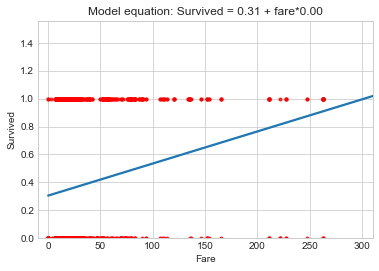

In [328]:
g = sns.regplot(data["fare"], data["survived"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model equation: Survived = 0.31 + fare*0.00")
g.set_ylabel("Survived")
g.set_xlabel("Fare")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

## Linear Regression

In [329]:

from sklearn.linear_model import LinearRegression

In [335]:
X = data[["fare"]]
y = data["survived"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([0.00229601])

In [336]:
X.shape

(1309, 1)

In [337]:
model.score(X,y)

0.05973828353608246

In [338]:
model.predict(X)[0:10]

array([0.79078948, 0.65351705, 0.65351705, 0.65351705, 0.65351705,
       0.36651636, 0.4845501 , 0.30555741, 0.42375394, 0.41921933])

## Predict
* Model equation
* Survived = 0.31 + fare*0.00"

In [339]:
# 0.31 + fare*0.00"
Survived = 0.31 + 500*0.00
Survived

0.31

In [340]:
X = data[["fare"]]
y = data["survived"]
reg = LinearRegression()
model = reg.fit(X, y)

In [341]:
model.predict([[500]])

array([1.45356017])

In [342]:
new_value = [[5],[90],[200],[500],[1000]]

In [343]:
model.predict(new_value)

array([0.31703744, 0.51219791, 0.76475852, 1.45356017, 2.60156292])